### A demonstration of masking cmb sky and its effect on cls

In [1]:
import numpy as np
import healpy as hp
from matplotlib.pyplot import *
import tqdm
# from cmblensplus/wrap/
import basic
import curvedsky as cs
# from cmblensplus/utils/
import plottools as pl
import cmb

In [2]:
# define parameters
Tcmb  = 2.726e6    # CMB temperature
nside = 1024        # CMB map resolution
lmax  = 2048     # maximum multipole of alm to be generated
npix  = 12*nside**2
l = np.linspace(0,lmax,lmax+1)

In [3]:
# load cl
cl = cmb.read_camb_cls('../data/lensedcls.dat',ftype='lens',output='array')[:,:lmax+1]

In [4]:
# load survey window
#W = hp.fitsfunc.read_map('../data/wmap_temperature_kq85_analysis_mask_r9_9yr_v5.fits',verbose=False)
W = hp.fitsfunc.read_map('../data/ACT_s16.fits',verbose=False)
W = hp.ud_grade(W,nside)
M = W.copy()
M[M!=0.] = 1.
w2 = np.average(W**2)
fsky = np.average(M)
print('W2 correction and fsky are',w2,fsky)

W2 correction and fsky are 0.018470711876717633 0.020545562108357746


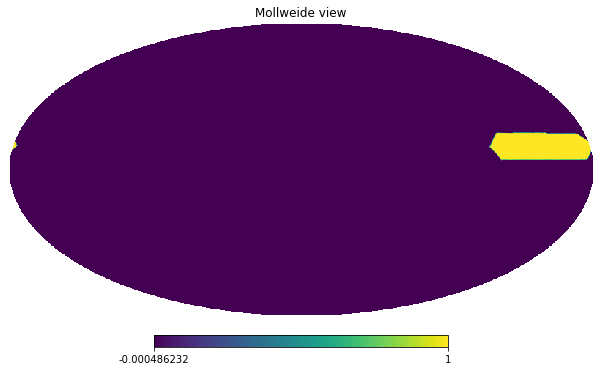

In [5]:
hp.mollview(W)

In [6]:
sn = 10
ol = np.zeros((sn,lmax+1))
for i in tqdm.tqdm(range(sn)):
    # Gaussian alms are generated here
    Talm = cs.utils.gauss1alm(lmax,cl[0,:])
    # fullsky T/Q/U
    Tmap = cs.utils.hp_alm2map(nside,lmax,lmax,Talm)
    #print(np.mean(Tmap*W))
    # alms from masked T/Q/U
    Tolm = cs.utils.hp_map2alm(nside,lmax,lmax,Tmap*W)
    ol[i] = cs.utils.alm2cl(lmax,Tolm)/w2

100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


In [7]:
mcl = np.mean(ol,axis=0)
vcl = np.std(ol,axis=0)

No handles with labels found to put in legend.


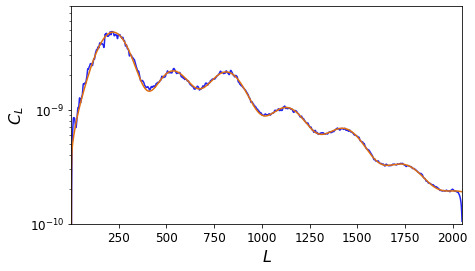

In [8]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=lmax,ymin=1e-10,ymax=8e-9,ylog=True)
plot(l,l**2*mcl)
plot(l,l**2*cl[0])
legend()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
No handles with labels found to put in legend.


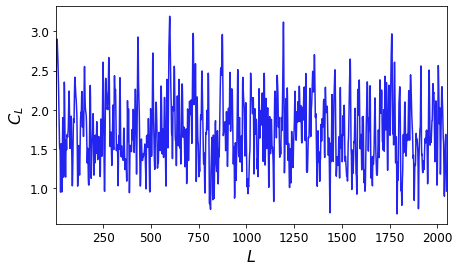

In [9]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=lmax)
plot(l,vcl/mcl*np.sqrt(l+0.5))
legend()